In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


: 

In [ ]:
'''
Function to read CSV file and return a list of dictionaries
'''

def read_csv(file_path):
    data = []
    with open(file_path, 'r') as file:
        header = file.readline().strip().split(',')
        for line in file:
            values = line.strip().split(',')
            entry = {header[i]: values[i] for i in range(len(header))}
            data.append(entry)
    return data


: 

In [1994]:
'''
Function to convert date to datetime object if it is a string
'''
def convert_to_datetime(date):
    if isinstance(date, str):
        return datetime.strptime(date, '%Y-%m-%d')
    return date

# Question 1

In [1995]:
'''
Function to calculate the impact of a discount change on sales data
'''

def discount_impact(before_change_date, sales_data, products_data):
    
    sales_before_change = [sale for sale in sales_data if sale['date'] < before_change_date]
    sales_after_change = [sale for sale in sales_data if sale['date'] >= before_change_date]

    
    avg_discount_before = sum(1 for sale in sales_before_change if float(sale['discount']) == 0) / len(sales_before_change) * 100
    avg_discount_after = sum(1 for sale in sales_after_change if float(sale['discount']) == 0) / len(sales_after_change) * 100

    print(f"Average transaction without discount: {avg_discount_before:5.2f}% - {avg_discount_after:5.2f}%")

    
    print("\nAverage discount per product:")
    print(f"{'PID':>3}{'Product Name':>20}{' <08-01':>5} {'- >=08-01':>5}")

    for product in products_data:
        pid = product['Product_ID']
        name = product['Product_Name']

        before_discounts = []
        after_discounts = []

        for sale in sales_data:
            if sale['product_id'] == pid:
                if sale['date'] < before_change_date:
                    before_discounts.append(float(sale['discount']) * float(sale['quantity']))
                else:
                    after_discounts.append(float(sale['discount']) * float(sale['quantity']))

        total_quantity_before = sum(float(sale['quantity']) for sale in sales_data if sale['product_id'] == pid and sale['date'] < before_change_date)
        total_quantity_after = sum(float(sale['quantity']) for sale in sales_data if sale['product_id'] == pid and sale['date'] >= before_change_date)

        before_avg = (sum(before_discounts) / total_quantity_before) * 100 if total_quantity_before > 0 else 0.0
        after_avg = (sum(after_discounts) / total_quantity_after) * 100 if total_quantity_after > 0 else 0.0

    
        print(f"{pid:>3}{name:>20} {before_avg:5.2f}% - {after_avg:5.2f}%")


# Question 2

In [1996]:
'''
Function to calculate and print the average number of sale transactions and the average amount of sales per weekday
'''
def business_per_weekday(sales_data, returns_data, product_data):
    for data in [sales_data, returns_data]:
        for entry in data:
            entry['date'] = convert_to_datetime(entry['date'])

    
    all_transactions = sales_data + returns_data

    
    weekday_counts = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}
    weekday_turnover = {'Monday': 0.0, 'Tuesday': 0.0, 'Wednesday': 0.0, 'Thursday': 0.0, 'Friday': 0.0, 'Saturday': 0.0, 'Sunday': 0.0}
    product_prices = {product['Product_ID']: float(product['Price']) for product in product_data}
    unique_days = {'Monday': set(), 'Tuesday': set(), 'Wednesday': set(), 'Thursday': set(), 'Friday': set(), 'Saturday': set(), 'Sunday': set()}

    # Calculates counts and turnover for each weekday
    for transaction in all_transactions:
        weekday = transaction['date'].strftime('%A')
        unique_days[weekday].add(transaction['date'].date())
        if transaction in sales_data:
            weekday_counts[weekday] += 1
            product_id = transaction['product_id']
            product_price = float(transaction['quantity']) * product_prices.get(product_id, 0.0)
            discounted_price = product_price - (product_price * float(transaction['discount']))
            weekday_turnover[weekday] += discounted_price

    # Display 
    print("+-----------+-----+-------------+")
    print("| Day       |NB Tr|    Turnover |")
    print("+-----------+-----+-------------+")

    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        
        unique_day_count = len(unique_days[day])
        count = weekday_counts[day] / unique_day_count
        avg_turnover = weekday_turnover[day] / unique_day_count if unique_day_count > 0 else 0.0
        formatted_turnover = '${:10,.2f}'.format(avg_turnover)
        print(f"| {day:9} | {round(count):3} | {formatted_turnover:12}|")

    print("+-----------+-----+-------------+")
                              
    
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    counts = [(weekday_counts[day] / len(unique_days[day])) for day in weekdays]    
    amounts = [weekday_turnover[day] / len(unique_days[day]) if len(unique_days[day]) > 0 else 0.0 for day in weekdays]

    # Plotting number of transactions per weekday
    bars = plt.bar(weekdays, counts, color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red'])
    plt.xlabel('Day')
    plt.ylabel('Number of Transactions')
    plt.title('Number of Transactions per Weekday')
    
    for bar, count in zip(bars, counts):
        rounded_count = round(count) 
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(rounded_count), ha='center', va='bottom', fontsize=9)
    
    plt.show()

    # Plotting average amounts per weekday
    bars = plt.bar(weekdays, amounts, color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red'])
    plt.xlabel('Day')
    plt.ylabel('Average Turnover')
    plt.title('Average Turnover per Weekday')
    plt.ticklabel_format(style='plain', axis='y')     
    for bar, amount in zip(bars, amounts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'${amount:,.2f}',ha='center', va='bottom', fontsize=9)                 
    plt.show()


# Question 3

In [1997]:
'''
Function to calculate the most expensive day in terms of returns and to print the total cost of all returns that day, based on shelving costs.
'''
def most_expensive_return_day(sales_data, returns_data, products_data):
    
    returns_by_date = {}
    for return_transaction in returns_data:
        date = return_transaction['date']
        if date not in returns_by_date:
            returns_by_date[date] = []
        returns_by_date[date].append(return_transaction['transaction_id'])
       
    shelving_costs = {} 
    products_returned = []
    for date, transactions in returns_by_date.items():
        total_cost = 0

        for each_tranaction_id in transactions:
            original_transaction = next((sale for sale in sales_data if sale['transaction_id'] == each_tranaction_id), None)
            
            if original_transaction:
                original_price = int(next(product['Price'] for product in products_data if product['Product_ID']  == original_transaction['product_id']), 0)
                shelving_cost = int(original_transaction['quantity']) * original_price * 0.10  # 10% of original price
                total_cost += shelving_cost
                
                products_returned.append({'PID': original_transaction['product_id'],
                    'Product Name': next(product['Product_Name'] for product in products_data if product['Product_ID']  == original_transaction['product_id']),
                    'NoI': original_transaction['quantity'], 
                    'RS Cost': shelving_cost})
                    
        shelving_costs[date] = total_cost
    
    most_expensive_day = max(shelving_costs, key=lambda i: shelving_costs[i])
    max_total_cost = shelving_costs[most_expensive_day]
    
    # Print the result
    print(f"{most_expensive_day.strftime('%A, %B %d, %Y')} Total Return Shelving(RS) Cost={max_total_cost:,.2f}")
    
    print("Products returned that day:")
    print("\nPID         Product Name NoI     RS Cost")
    for product_returned in products_returned:
        print(f"{product_returned['PID']:3} {product_returned['Product Name']:20} {product_returned['NoI']:3} $ {product_returned['RS Cost']:10,.2f}")
        

# Question 4

In [1998]:
'''
Function to create a text file named "order_supplier_January.txt" to list the order from suppliers the same number of items for each product as sold that month and print the same information on the screen. 
'''
def generate_order_info(sales_data, returns_data, products_data):
    order_data = {}

    for transaction in sales_data:
        product_id = transaction['product_id']
        if product_id not in order_data:
            order_data[product_id] = 0
        order_data[product_id] += int(transaction['quantity'])
        
    for transaction in returns_data:
        transaction_id = transaction['transaction_id']
        sale_transaction = next((sale for sale in sales_data if sale['transaction_id'] == transaction_id), None)
        if sale_transaction:
            product_id = sale_transaction['product_id']
            order_data[product_id] -= int(sale_transaction['quantity'])
            
    sorted_order_data = dict(sorted(order_data.items(), key=lambda x: int(x[0][1:]))) 
        
    # writes to file
    with open("order_supplier_January.txt", "w") as file:
        for product_id, quantity in sorted_order_data.items():
            product_name = next((product['Product_Name'] for product in products_data if product['Product_ID']  == product_id), None)
            file.write(f"{product_id}#{product_name}#{quantity}\n")
        
    for product_id, quantity in sorted_order_data.items():
        product_name = next((product['Product_Name'] for product in products_data if product['Product_ID']  == product_id), None)
        print(f"{product_id:>3} {product_name:<20} {quantity:>3}")

# Question 5

In [1999]:
'''
Function to print a list of products that were never sold taking the returns into account as well
'''

def unwanted_products(sales_data, returns_data, products_data):
    for data in [sales_data, returns_data]:
        for entry in data:
            entry['date'] = convert_to_datetime(entry['date'])

    all_transactions = sales_data + returns_data
    total_sales = {product['Product_ID']: 0 for product in products_data}
    dates_of_sale = {product['Product_ID']: [] for product in products_data}

    # Subtracts the number of returned products
    for transaction in returns_data:
        transaction_id = transaction['transaction_id']
        sale_transaction = next((sale for sale in sales_data if sale['transaction_id'] == transaction_id), None)
        if sale_transaction:
            product_id = sale_transaction['product_id']
            total_sales[product_id] -= int(sale_transaction['quantity'])

    # Calculates total sales and dates of sale for each product
    for transaction in all_transactions:
        product_id = transaction.get('product_id') or transaction.get('Product_ID')
        if product_id and transaction in sales_data:
            total_sales[product_id] += int(transaction['quantity'])
            dates_of_sale[product_id].append(transaction['date'].strftime('%y/%m/%d'))

    never_sold_products = [product for product in products_data if total_sales[product['Product_ID']] == 0]

    least_sold_quantity = min(total_sales.values())
    least_sold_products = [product for product in products_data if total_sales[product['Product_ID']] == least_sold_quantity]

    if never_sold_products:
        print("\nProducts that were never sold:")
        for product in never_sold_products:
            print(f"{product['Product_ID']:>3} {product['Product_Name']:<20}")
    else:
        print("\nProduct(s) with the least sales:")
        for product in least_sold_products:
            print(f"{product['Product_ID']:>3} {product['Product_Name']:<20} "
                  f"{total_sales.get(product['Product_ID'], 0):03} "
                  f"[{', '.join(dates_of_sale[product['Product_ID']])}]")


# Question 6

In [2000]:
'''
Function to calculate from the data to shows a correlation between the average discount obtained for a product and its original price
'''

def discount_price_correlation(sales_data, returns_data, products_data):
    
    valid_sales_data = [sale for sale in sales_data if sale not in returns_data]
    prices = [float(product['Price']) for product in products_data]
    
    discount_data = {}
    
    for sale in valid_sales_data:
        product_id = sale.get('product_id') or sale.get('Product_ID')
        discount = float(sale['discount'])
        quantity = float(sale['quantity'])

        if any(return_sale['transaction_id'] == sale['transaction_id'] for return_sale in returns_data):
            continue
        
        if product_id not in discount_data:
            discount_data[product_id] = {'total_discount': 0, 'total_quantity': 0}

        discount_data[product_id]['total_discount'] += discount * quantity
        discount_data[product_id]['total_quantity'] += quantity
     
    average_discounts = []
    for product in products_data:
        product_id = product['Product_ID']
        total_discount = discount_data.get(product_id, {'total_discount': 0})['total_discount']
        total_quantity = discount_data.get(product_id, {'total_quantity': 0})['total_quantity']
        
        if total_quantity > 0:
            average_discount = total_discount / total_quantity
        else:
            average_discount = 0
        
        average_discounts.append(average_discount)
        
    
    correlation_matrix = np.corrcoef(prices, average_discounts)
    pearson_correlation = correlation_matrix[0, 1]

    print(f"\nPearson Correlation= {pearson_correlation:.3f}")

    coef = np.polyfit(prices, average_discounts, 1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(prices, average_discounts, 'bo', prices, poly1d_fn(prices), '--k')
    plt.show()
    
    


QUESTION 1 OUTPUT:
Average transaction without discount:  3.38% -  3.90%

Average discount per product:
PID        Product Name <08-01 - >=08-01
 P1       2-in-1 Laptop  9.88% -  6.90%
 P2         Game Laptop  7.45% -  7.59%
 P3        Titan Laptop  9.29% -  6.91%
 P4  Folding Smartphone  9.06% -  7.25%
 P5    Smart Smartphone  9.10% -  7.50%
 P6        T headphones 10.16% -  8.31%
 P7 Cordless Headphones  7.29% -  7.22%
 P8       "13"" Tablet" 10.09% -  6.68%
 P9        e-ink Tablet 10.09% -  6.69%
P10       "10"" Tablet" 10.14% -  7.75%
P11      Colour Printer 10.28% -  6.91%
P12       Laser Printer  9.59% -  7.47%
P13            Mega MP3  9.58% -  7.04%
P14         Flat screen  8.15% -  7.06%
P15      Gaming Monitor 10.03% -  7.47%
P16       Camera Webcam  0.00% -  7.86%
P17       Camera TocTic  0.00% -  6.87%
P18Multidirectional mic  0.00% -  7.81%
P19           Drone Cam  0.00% -  8.05%
P20     Health Daylight  0.00% -  7.94%

QUESTION 2 OUTPUT:
+-----------+-----+-------------+
|

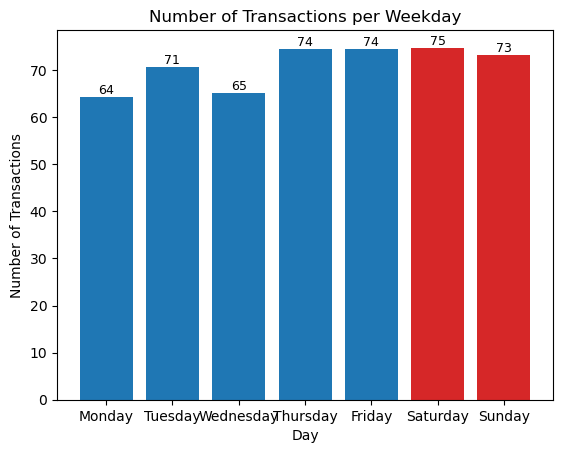

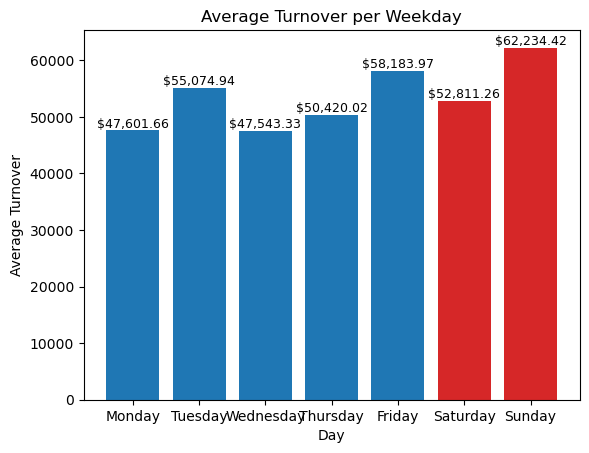


QUESTION 3 OUTPUT:
Monday, January 29, 2024 Total Return Shelving(RS) Cost=1,380.00
Products returned that day:

PID         Product Name NoI     RS Cost
P10 "10"" Tablet"        1   $      20.00
P6  T headphones         1   $      10.00
P7  Cordless Headphones  1   $      11.00
P1  2-in-1 Laptop        1   $     150.00
P6  T headphones         1   $      10.00
P8  "13"" Tablet"        1   $      30.00
P15 Gaming Monitor       3   $      75.00
P4  Folding Smartphone   1   $      50.00
P12 Laser Printer        1   $      25.00
P13 Mega MP3             2   $      20.00
P12 Laser Printer        1   $      25.00
P3  Titan Laptop         1   $     210.00
P10 "10"" Tablet"        3   $      60.00
P16 Camera Webcam        1   $       5.00
P18 Multidirectional mic 1   $      20.00
P15 Gaming Monitor       4   $     100.00
P14 Flat screen          1   $      20.00
P4  Folding Smartphone   1   $      50.00
P5  Smart Smartphone     1   $      80.00
P11 Colour Printer       5   $     100.00
P8  "

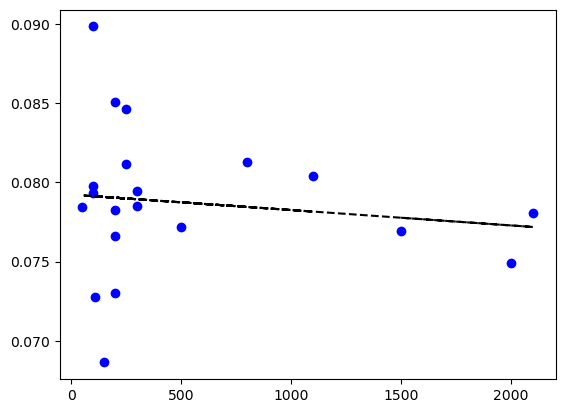

In [2001]:
'''
Main method
'''
def main():
    products_data = read_csv('transactions_Products_January.csv')

    sales_data = read_csv('transactions_Sales_January.csv')

    returns_data = read_csv('transactions_Returns_January.csv')
    
    for data in [sales_data, returns_data]:
        for entry in data:
            entry['date'] = datetime.strptime(entry['date'], '%Y-%m-%d')
    
    print("QUESTION 1 OUTPUT:")
    discount_impact(datetime(2024, 1, 8), sales_data, products_data)#QUESTION 1
    
    print("\nQUESTION 2 OUTPUT:")
    business_per_weekday(sales_data, returns_data, products_data)#QUESTION 2
    
    print("\nQUESTION 3 OUTPUT:")
    most_expensive_return_day(sales_data, returns_data, products_data)#QUESTION 3
    
    print("\nQUESTION 4 OUTPUT:")
    generate_order_info(sales_data, returns_data, products_data)#QUESTION 4
    
    print("\nQUESTION 5 OUTPUT:")
    unwanted_products(sales_data, returns_data, products_data)#QUESTION 5
    
    print("\nQUESTION 6 OUTPUT:")
    discount_price_correlation(sales_data, returns_data, products_data)#QUESTION 6
    
if __name__ == "__main__":
    main()
